이 노트북의 코드에 대한 설명은 [더욱 랜덤한 포레스트-익스트림 랜덤 트리(ExtraTreesClassifier)](https://tensorflow.blog/2017/11/30/%eb%8d%94%ec%9a%b1-%eb%9e%9c%eb%8d%a4%ed%95%9c-%ed%8f%ac%eb%a0%88%ec%8a%a4%ed%8a%b8-%ec%9d%b5%ec%8a%a4%ed%8a%b8%eb%a6%bc-%eb%9e%9c%eb%8d%a4-%ed%8a%b8%eb%a6%acextratreesclassifier/) 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

CPython 3.5.4
IPython 6.2.1

sklearn 0.19.1
numpy 1.13.3
scipy 1.0.0
matplotlib 2.1.0


In [2]:
%matplotlib inline
from preamble import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

xtree = ExtraTreesClassifier(n_estimators=5, random_state=2)
xtree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [4]:
print(xtree.score(X_train, y_train))
print(xtree.score(X_test, y_test))

1.0
0.88


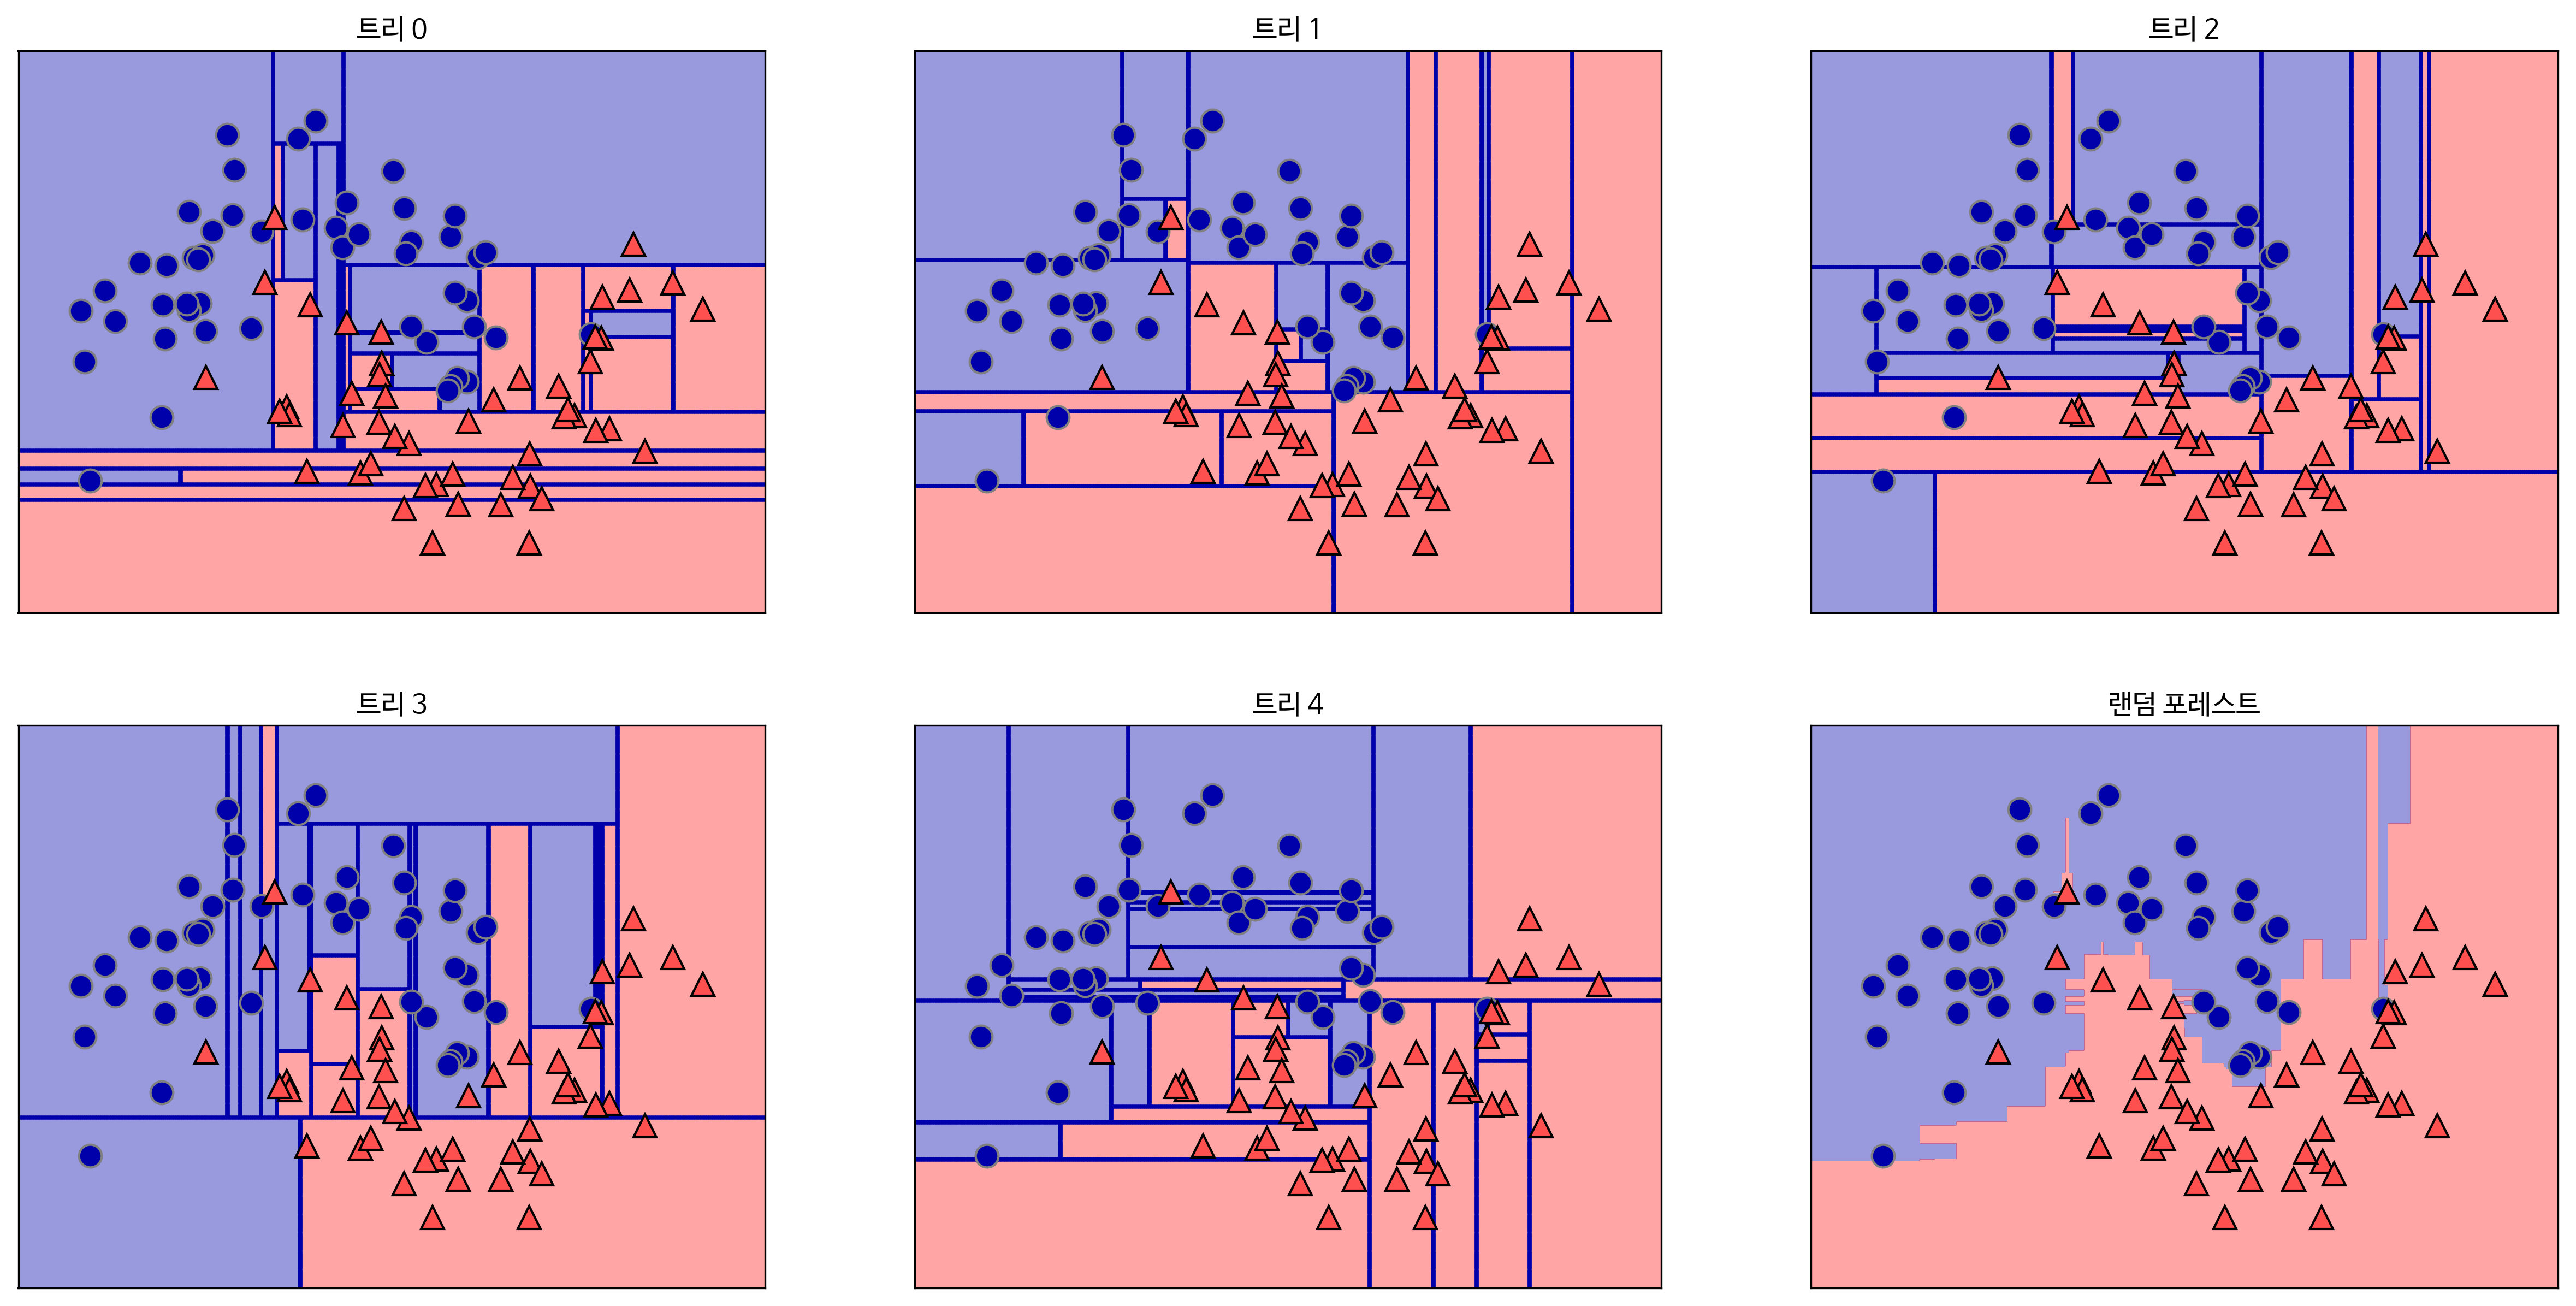

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
xtree = ExtraTreesClassifier(n_estimators=100, random_state=0)
xtree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


(-1, 30)

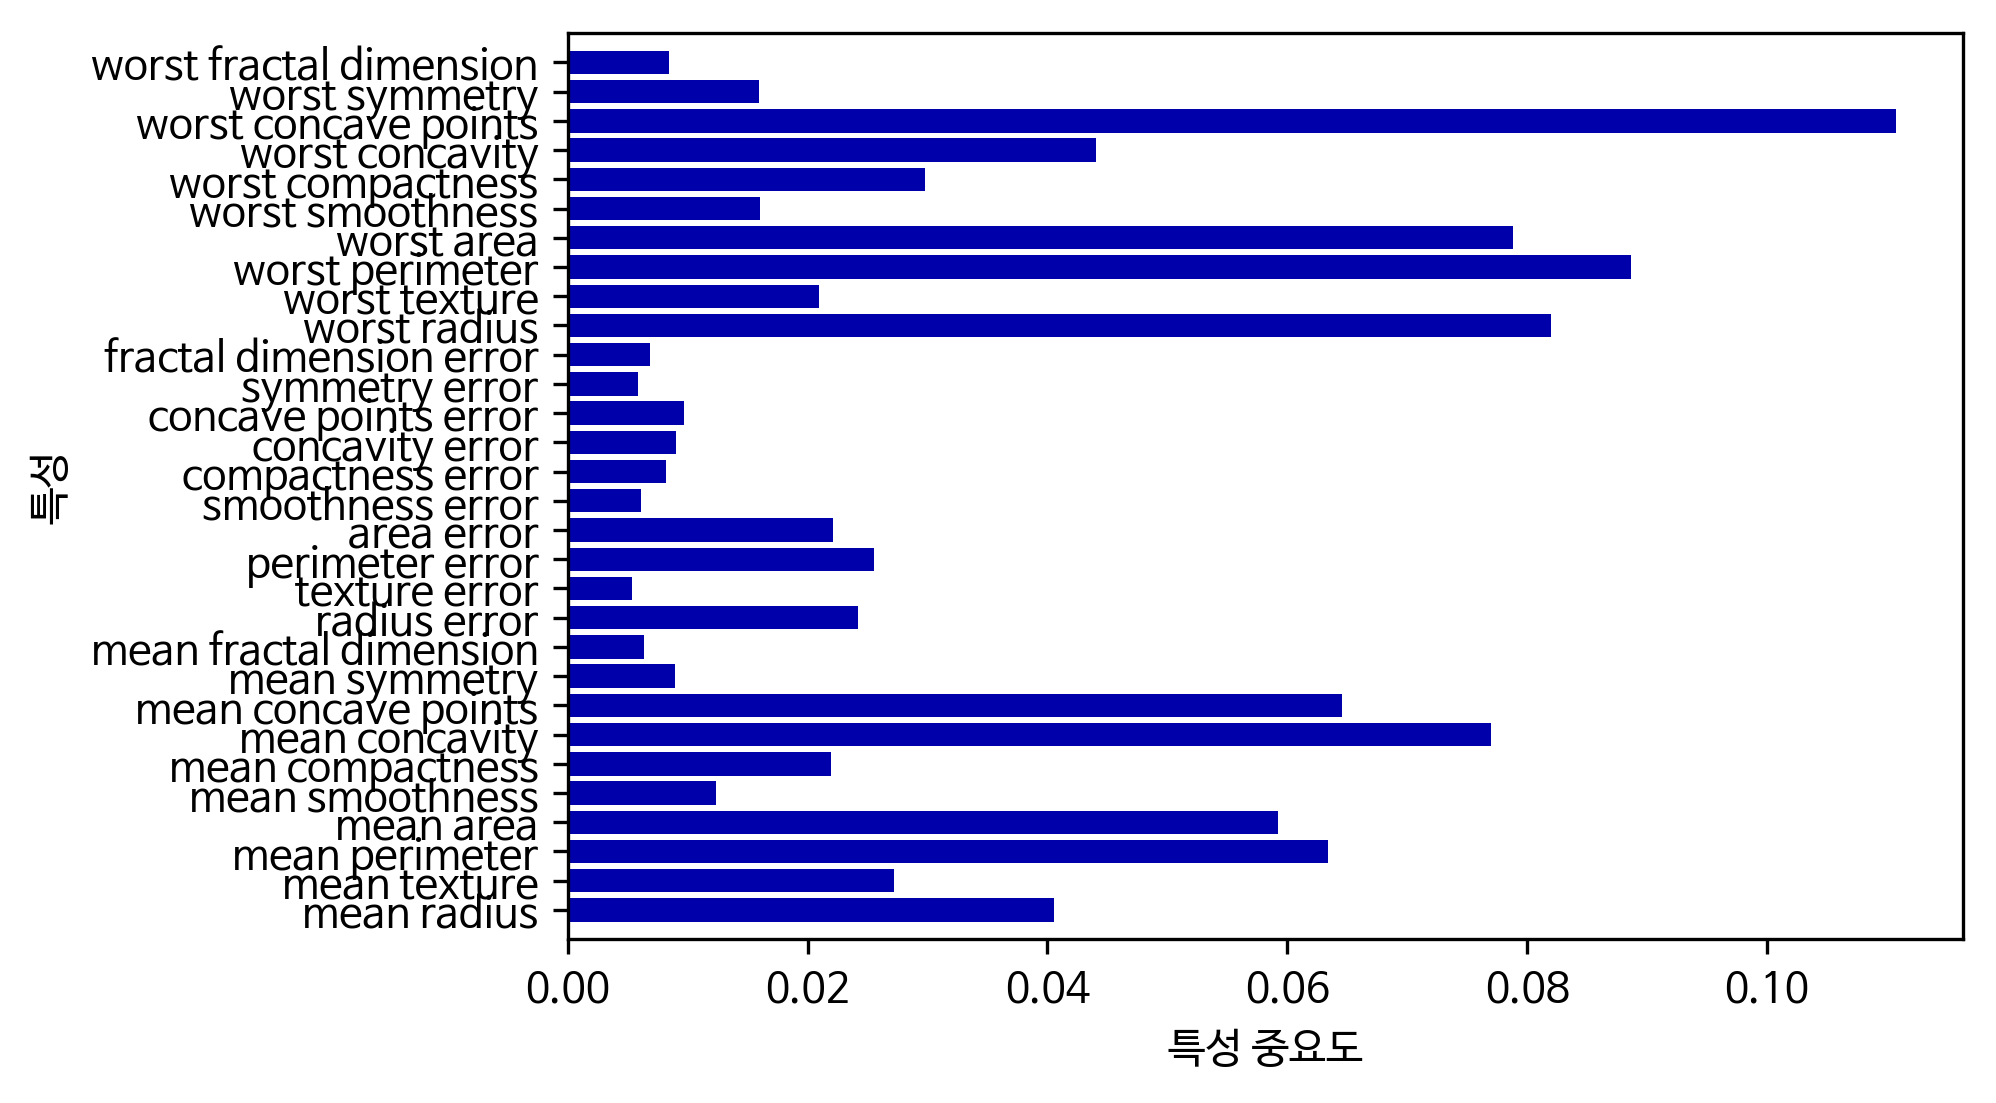

In [7]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)